In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ubiquant-parquet/example_sample_submission.parquet
/kaggle/input/ubiquant-parquet/example_test.parquet
/kaggle/input/ubiquant-parquet/train.parquet
/kaggle/input/ubiquant-parquet/train_low_mem.parquet
/kaggle/input/ubiquant-parquet/investment_ids/3136.parquet
/kaggle/input/ubiquant-parquet/investment_ids/858.parquet
/kaggle/input/ubiquant-parquet/investment_ids/861.parquet
/kaggle/input/ubiquant-parquet/investment_ids/500.parquet
/kaggle/input/ubiquant-parquet/investment_ids/2197.parquet
/kaggle/input/ubiquant-parquet/investment_ids/2825.parquet
/kaggle/input/ubiquant-parquet/investment_ids/139.parquet
/kaggle/input/ubiquant-parquet/investment_ids/3249.parquet
/kaggle/input/ubiquant-parquet/investment_ids/2019.parquet
/kaggle/input/ubiquant-parquet/investment_ids/3473.parquet
/kaggle/input/ubiquant-parquet/investment_ids/3671.parquet
/kaggle/input/ubiquant-parquet/investment_ids/2277.parquet
/kaggle/input/ubiquant-parquet/investment_ids/2730.parquet
/kaggle/input/ubiquant

# References :
https://www.kaggle.com/competitions/ubiquant-market-prediction/data   
https://www.kaggle.com/code/larochemf/ubiquant-low-memory-use-be-careful/notebook   
https://www.kaggle.com/code/robikscube/fast-data-loading-and-low-mem-with-parquet-files/notebook    
https://www.kaggle.com/code/lucamassaron/eda-target-analysis
https://www.kaggle.com/code/edwardcrookenden/eda-and-lgbm-baseline-feature-imp   
https://www.kaggle.com/competitions/ubiquant-market-prediction/discussion/305031
https://www.kaggle.com/code/junjitakeshima/ubiquant-simple-lgbm-removing-outliers-en-jp/notebook#(1)-Read-Trainiing-Data   


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Load Dataset

In [3]:
%%time
train_df = pd.read_parquet("/kaggle/input/ubiquant-parquet/train_low_mem.parquet")

CPU times: user 10.2 s, sys: 19 s, total: 29.2 s
Wall time: 40 s


### 'train' Features
row_id - A unique identifier for the row.  
time_id - The ID code for the time the data was gathered. The time IDs are in order, but the real time between the time IDs is not constant and will likely be shorter for the final private test set than in the training set.  
investment_id - The ID code for an investment. Not all investment have data in all time IDs.  
target - The target.  
[f_0:f_299] - Anonymized features generated from market data.

In [4]:
train_df.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [5]:
train_df['time_id'].value_counts()

1214    3445
1209    3444
1211    3440
1207    3440
1208    3438
        ... 
415      659
362      651
374      600
398      539
492      512
Name: time_id, Length: 1211, dtype: int64

In [6]:
print(train_df['time_id'].value_counts())

1214    3445
1209    3444
1211    3440
1207    3440
1208    3438
        ... 
415      659
362      651
374      600
398      539
492      512
Name: time_id, Length: 1211, dtype: int64


In [7]:
train_df['time_id'].value_counts().mean()

2594.0627580511973

In [8]:
train_df['investment_id'].value_counts()

2140    1211
2385    1209
1062    1209
1144    1209
2727    1209
        ... 
905        8
2558       8
3662       7
2800       3
1415       2
Name: investment_id, Length: 3579, dtype: int64

In [9]:
train_df['investment_id'].value_counts().mean()

877.7340039117072

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141410 entries, 0 to 3141409
Columns: 304 entries, row_id to f_299
dtypes: float32(301), object(1), uint16(2)
memory usage: 3.6+ GB


In [11]:
train_df.dtypes

row_id            object
time_id           uint16
investment_id     uint16
target           float32
f_0              float32
                  ...   
f_295            float32
f_296            float32
f_297            float32
f_298            float32
f_299            float32
Length: 304, dtype: object

In [12]:
train_df.shape

(3141410, 304)

In [13]:
pd.isnull(train_df).sum()

row_id           0
time_id          0
investment_id    0
target           0
f_0              0
                ..
f_295            0
f_296            0
f_297            0
f_298            0
f_299            0
Length: 304, dtype: int64

### Remove column(row_id)

In [14]:
train_df = train_df.drop('row_id', axis = 1)
train_df.head()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


## Visualization

In [15]:
time_id_count = train_df.groupby("investment_id")["time_id"].count()
time_id_count

investment_id
0        461
1       1108
2       1003
3       1076
4        316
        ... 
3768    1052
3769    1171
3770     889
3772    1084
3773     376
Name: time_id, Length: 3579, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


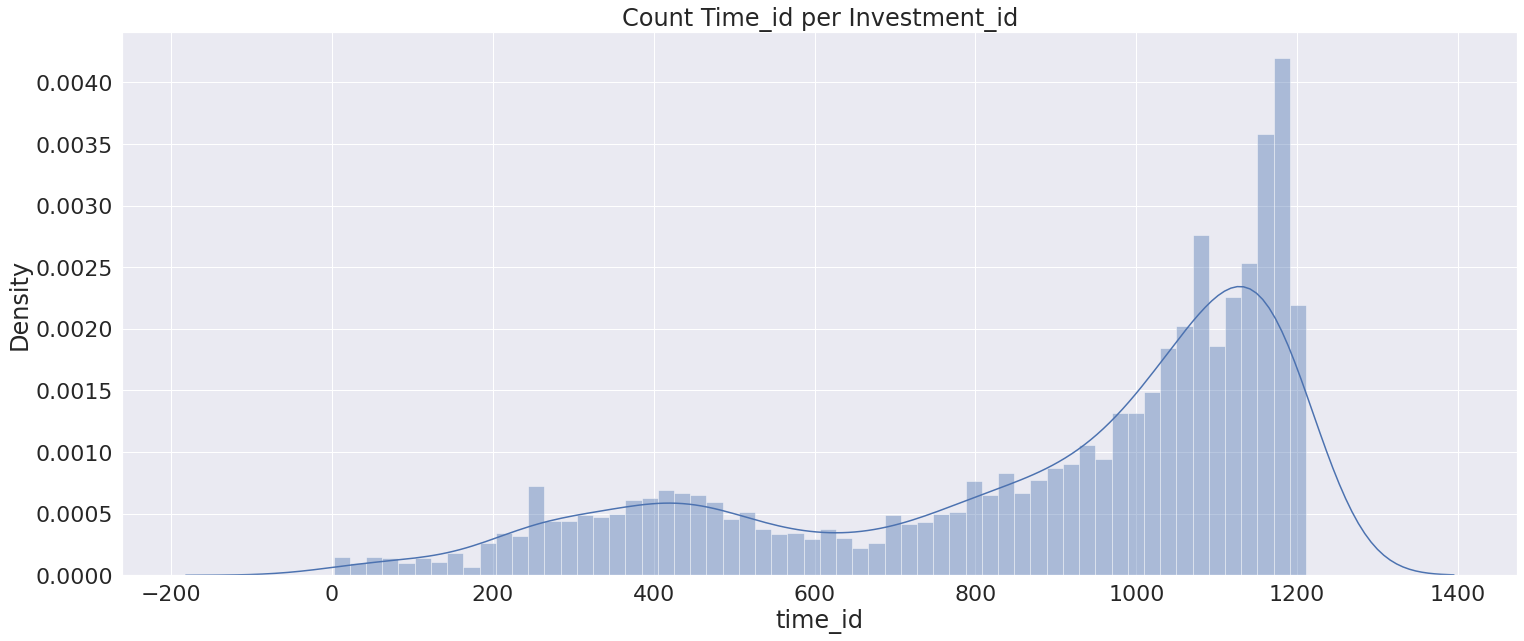

In [16]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.distplot(time_id_count, hist = True, bins=60)
plt.title('Count Time_id per Investment_id')
plt.show()

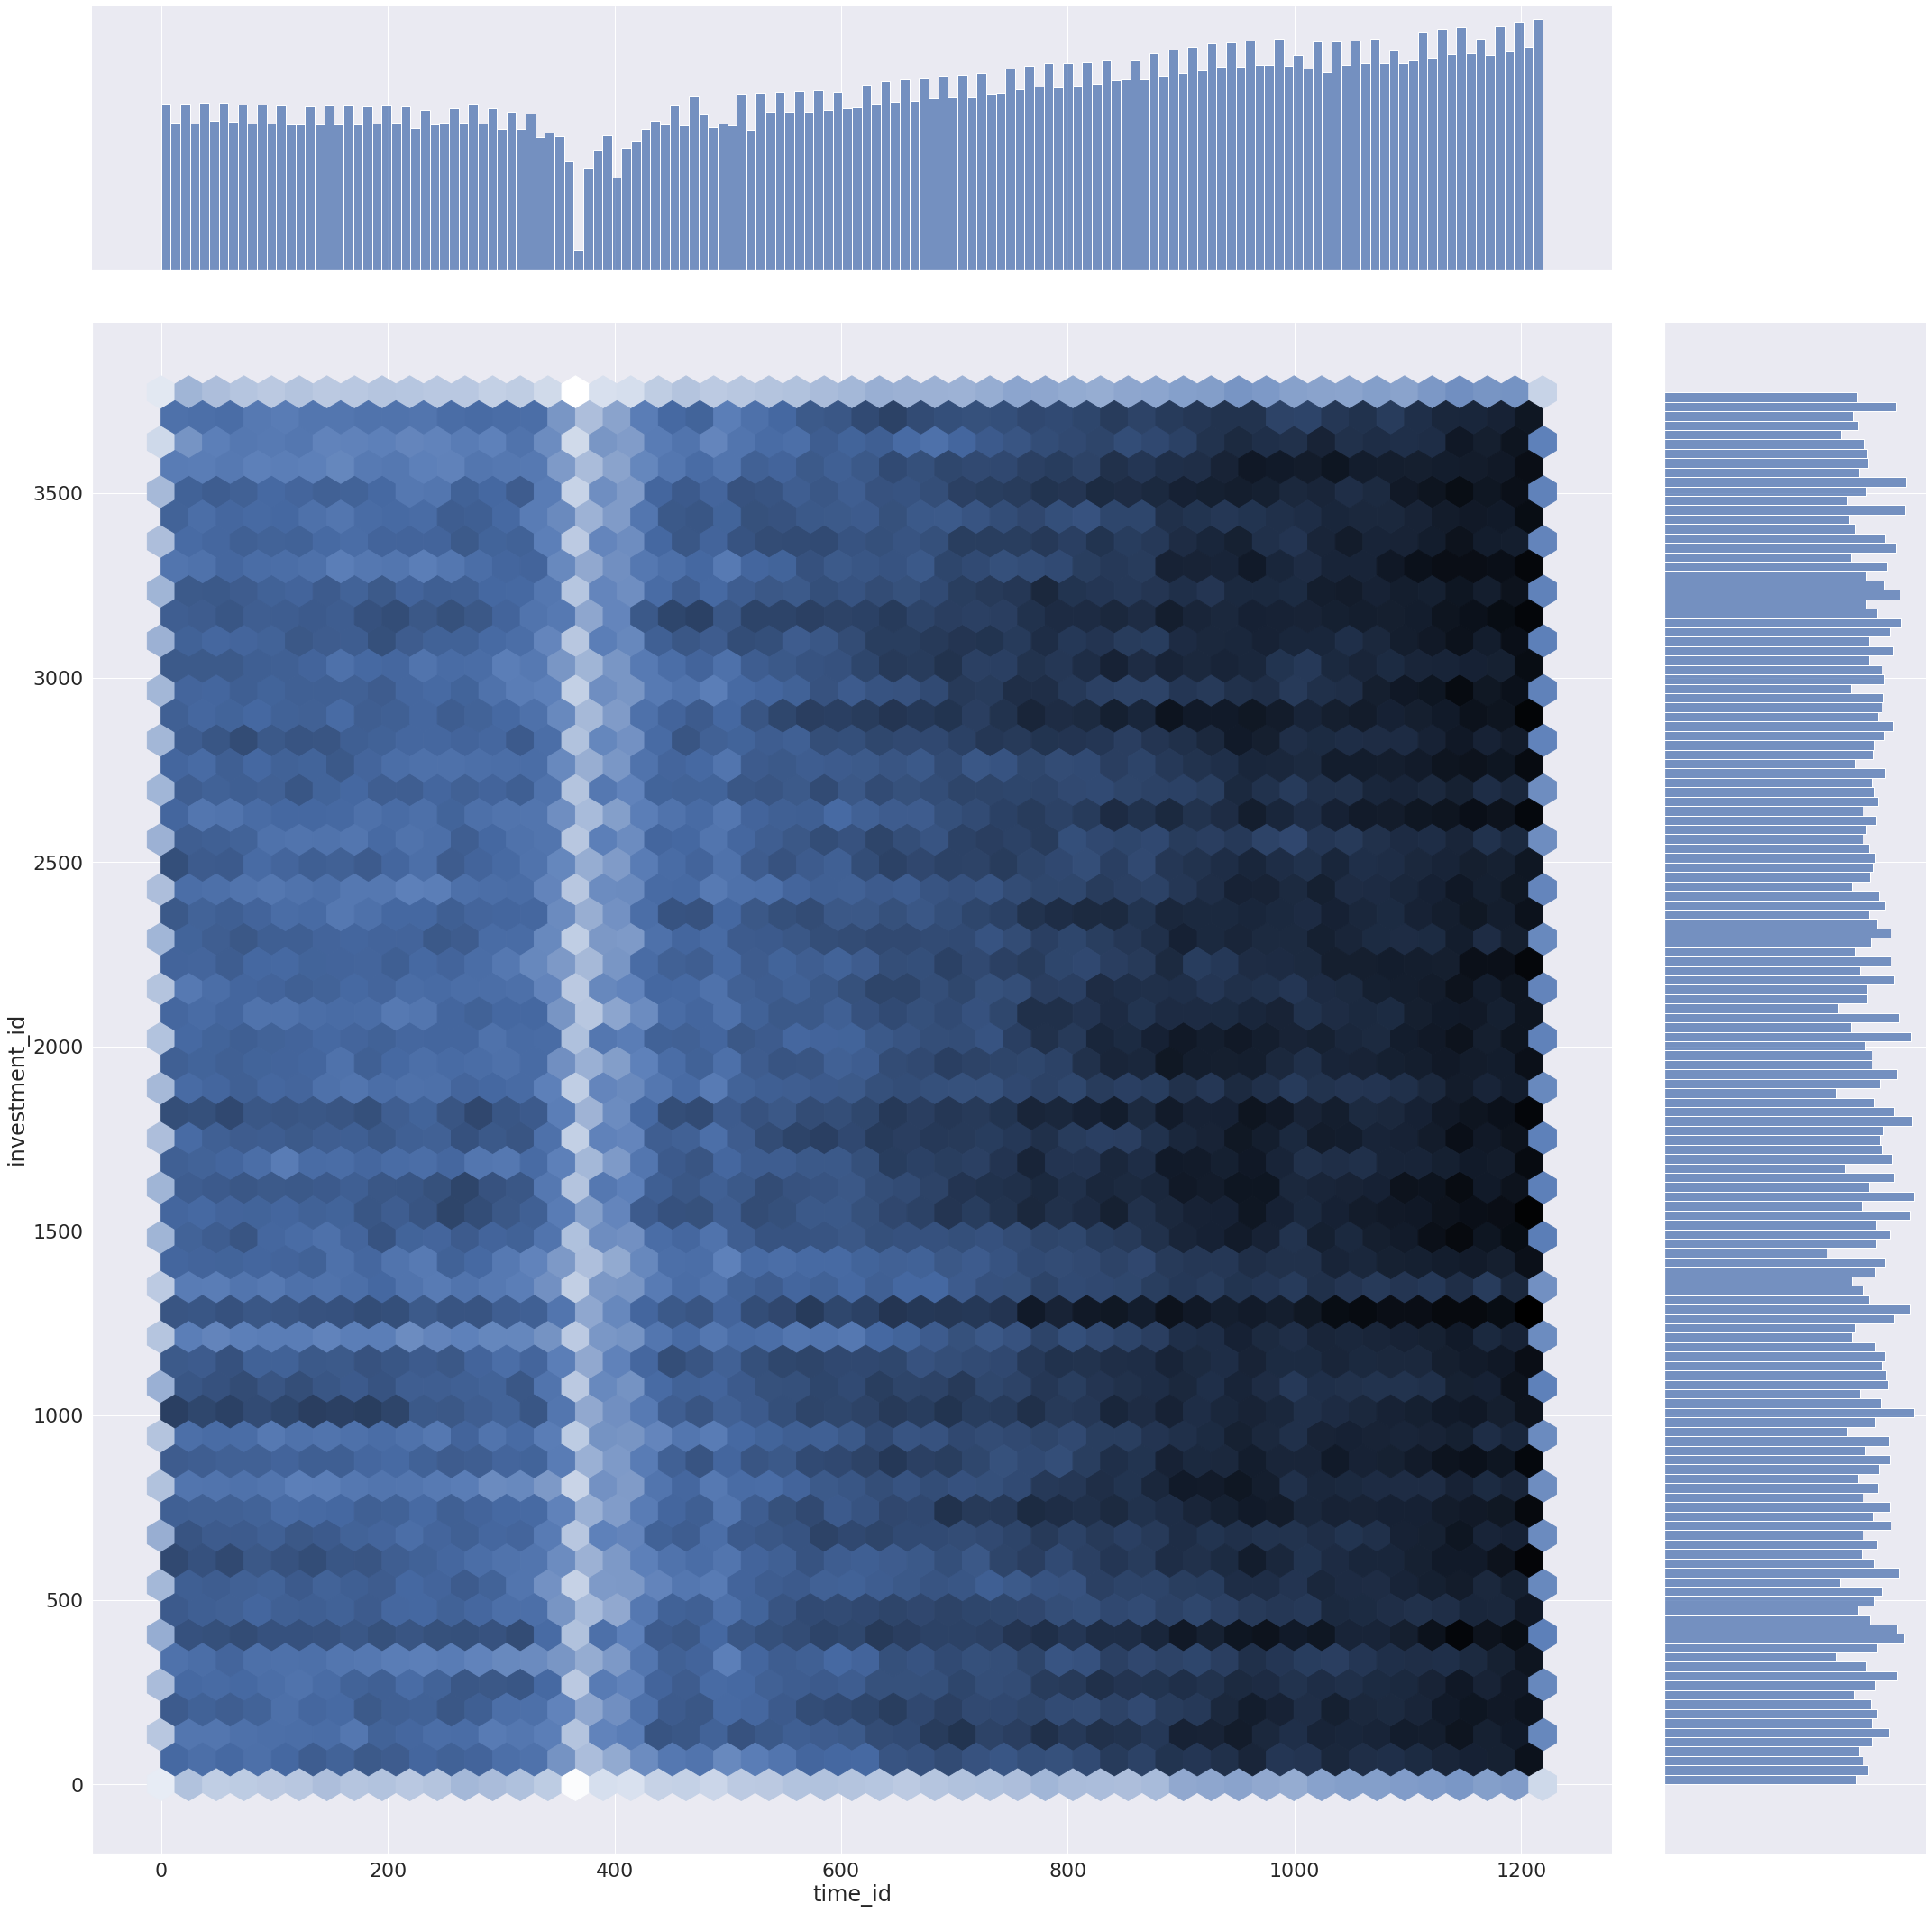

In [17]:
sns.jointplot(x = train_df['time_id'], y = train_df['investment_id'], kind='hex', height=30)

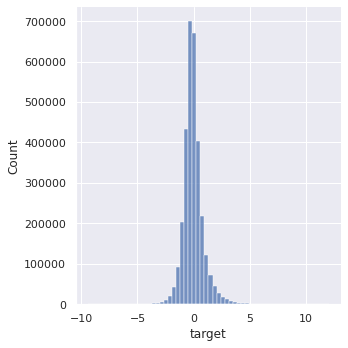

In [18]:
sns.set(font_scale=1)
ax = sns.displot(train_df['target'], bins=60)

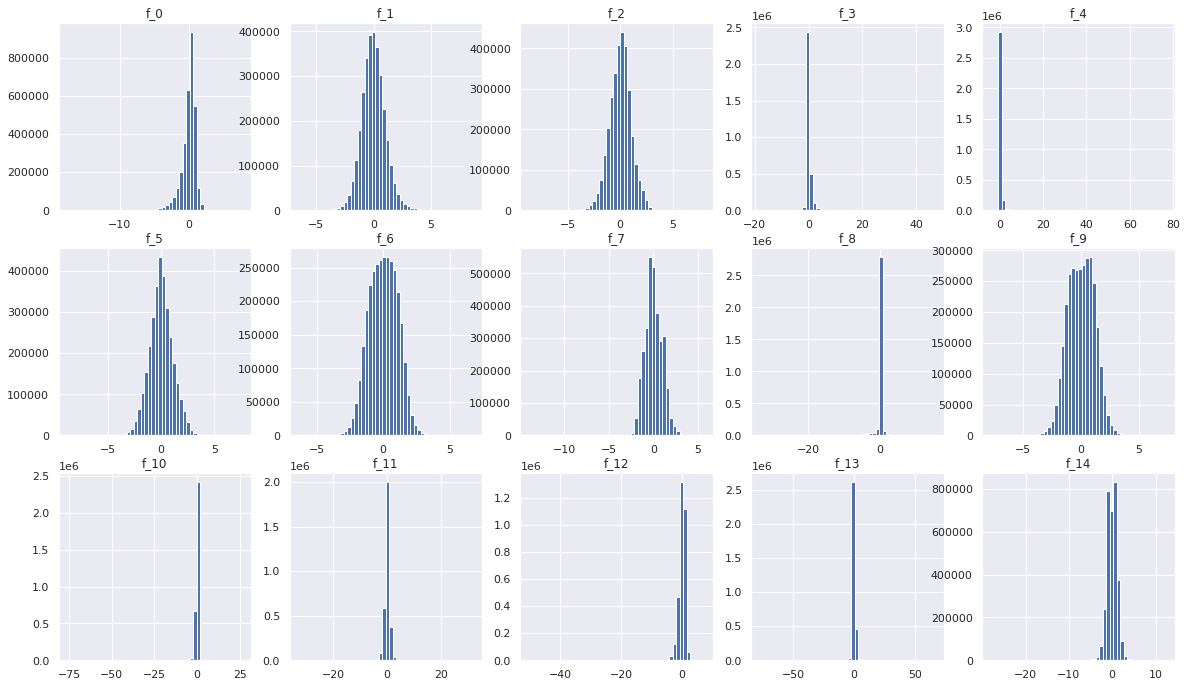

In [19]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1)
for i in range(0, 15):
    plt.subplot(5, 5, i+1)
    plt.hist(train_df[f"f_{i}"], bins=50)
    plt.title(f"f_{i}")
plt.show()

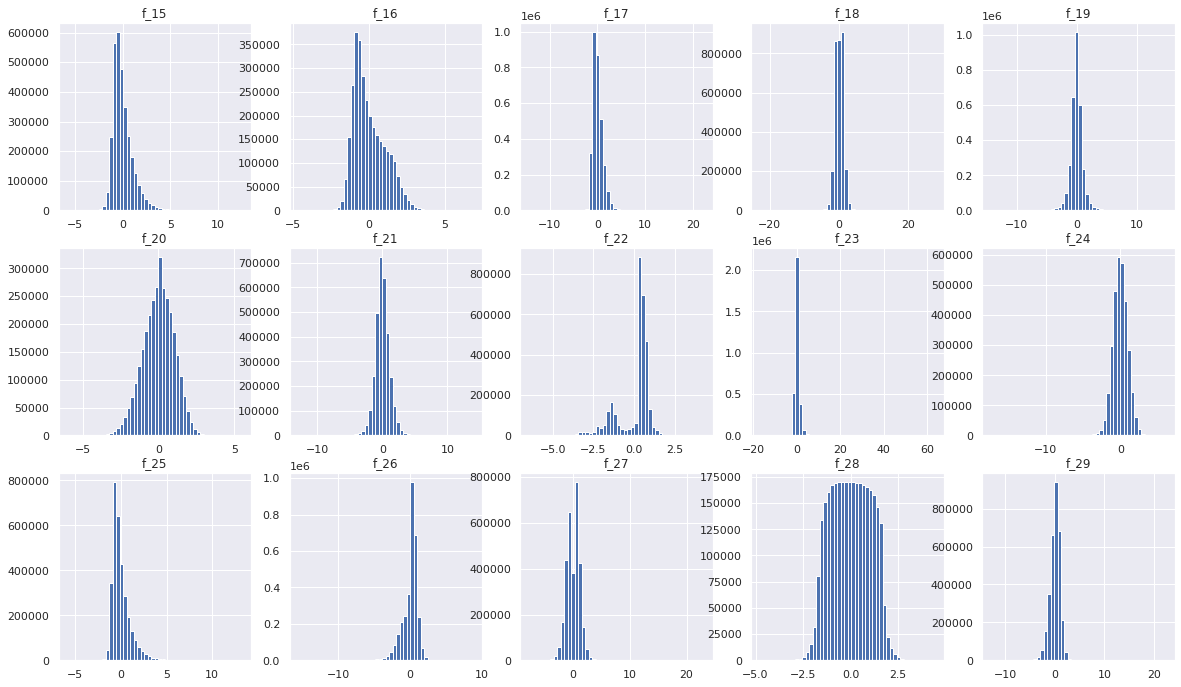

In [20]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1)
for i in range(15, 30):
    plt.subplot(5, 5, i-14)
    plt.hist(train_df[f"f_{i}"], bins=50)
    plt.title(f"f_{i}")
plt.show()

In [21]:
#col_list = train_df.columns.values.tolist()

#del col_list[2]

In [22]:
#X = train_df[col_list]
#y = train_df['target']

In [23]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)